## Robustness Test

### Normal setting

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time
import pickle
import random

from itertools import permutations
from functions import *

SEED = 123
random.seed(SEED)
np.random.seed(SEED)

In [2]:
from plotnine import ggplot, aes, labs, scales, theme, element_rect, element_text, geom_line, geom_point, geom_bar, geom_errorbar, geom_text, scale_x_continuous, scale_y_continuous

In [3]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

In [4]:
unique_routes = get_unique_routes(X)
unique_routes

array([[-1, -1,  1,  1,  1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1,  1, -1, -1]])

In [5]:
unique_paths = get_path_from_routes(X, unique_routes)
unique_paths

[{'path_id': 0, 'path': [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 1, 'path': [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 2, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 3, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 4, 'path': [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 5, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 6, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 7, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 8, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 9, 'path': [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]}]

In [6]:
for path_info in unique_paths:
    print(path_info['path_id'],get_weight_from_path(X,path_info['path']))

0 25
1 35
2 44
3 50
4 41
5 50
6 56
7 43
8 49
9 39


In [7]:
boot_sample_list = []
best_route_list = []

for _ in range(100):
    unique_routes = get_unique_routes(X)
    unique_paths = get_path_from_routes(X, unique_routes)
    #path_info_list = get_path_info_from_matrix(X)
    boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

    boot_sample_out = []
    for idx in range(0,len(unique_routes)):
        boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
    boot_sample_out = np.vstack(boot_sample_out)
    boot_sample_list.append(boot_sample_out)

    #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
    best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
    best_route_list.append(best_route)

In [8]:
boot_sample_df = pd.DataFrame(np.array(boot_sample_list)[:,:,1])/1000

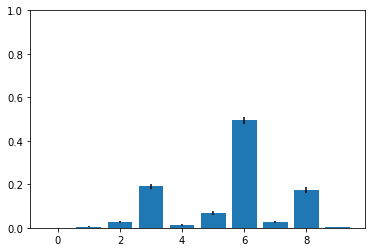

In [9]:
plt.bar(range(10), boot_sample_df.mean(), yerr=boot_sample_df.std())
plt.ylim(0,1)
plt.show()

### Noisy setting

In [10]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

0.4939499999999999 0.016027359814587774


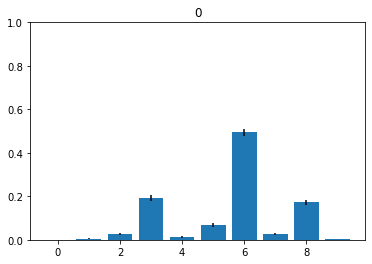

0.4946399999999999 0.017279941077340624


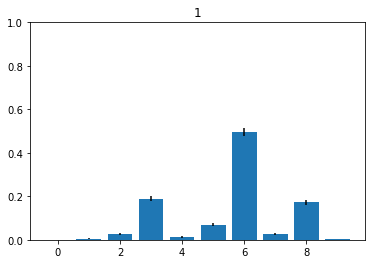

0.44068999999999997 0.03718033992270211


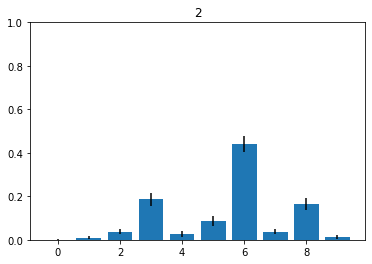

0.40568 0.052343442374341034


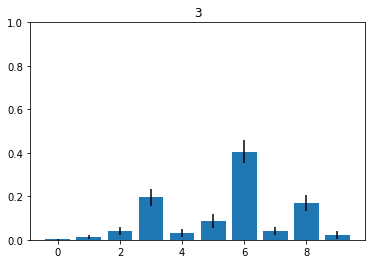

0.38640000000000013 0.0651078359572049


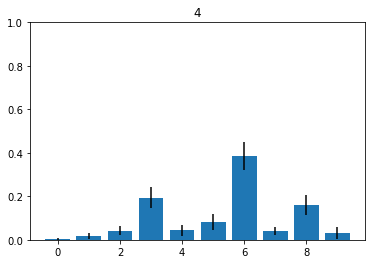

In [11]:
noisy_results = []

for noise in [0, 1, 2, 3, 4]:
    boot_sample_list = []
    best_route_list = []

    for _ in range(100):
        X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
        if noise != 0:
            X_noise = np.random.randint(low=0, high=noise, size=nc*nr).reshape(nr,nc)
            X = X + X_noise
            X = X.clip(0)

        unique_routes = get_unique_routes(X)
        unique_paths = get_path_from_routes(X, unique_routes)
        #path_info_list = get_path_info_from_matrix(X)
        boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

        boot_sample_out = []
        for idx in range(0,len(unique_routes)):
            boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
        boot_sample_out = np.vstack(boot_sample_out)
        boot_sample_list.append(boot_sample_out)

        #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
        best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
        best_route_list.append(best_route)
        
    boot_sample_df = pd.DataFrame(np.array(boot_sample_list)[:,:,1])/1000
    noisy_results.append(boot_sample_df)
    
    print(boot_sample_df.mean()[6], boot_sample_df.std()[6])
    
    plt.bar(range(10), boot_sample_df.mean(), yerr=boot_sample_df.std())
    plt.ylim(0,1)
    plt.title(noise)
    plt.show()

In [12]:
noisy_df = []
for i in range(5):
    df = noisy_results[i]
    noisy_df.append([df[6].mean(), df[6].std()])

In [13]:
noisy_df = pd.DataFrame(noisy_df, columns=['mean', 'std'])
noisy_df['noise'] = ['0', '1', '2', '3', '4']
noisy_df['noise'] = noisy_df['noise'].astype(str)

In [14]:
noisy_df['ymin'] = (noisy_df['mean']-noisy_df['std']).clip(lower=0)
noisy_df['ymax'] = (noisy_df['mean']+noisy_df['std']).clip(lower=0)
noisy_df

,mean,std,noise,ymin,ymax
0,0.49395,0.016027,0,0.477923,0.509977
1,0.49464,0.017280,1,0.477360,0.511920
2,0.44069,0.037180,2,0.403510,0.477870
3,0.40568,0.052343,3,0.353337,0.458023
4,0.38640,0.065108,4,0.321292,0.451508


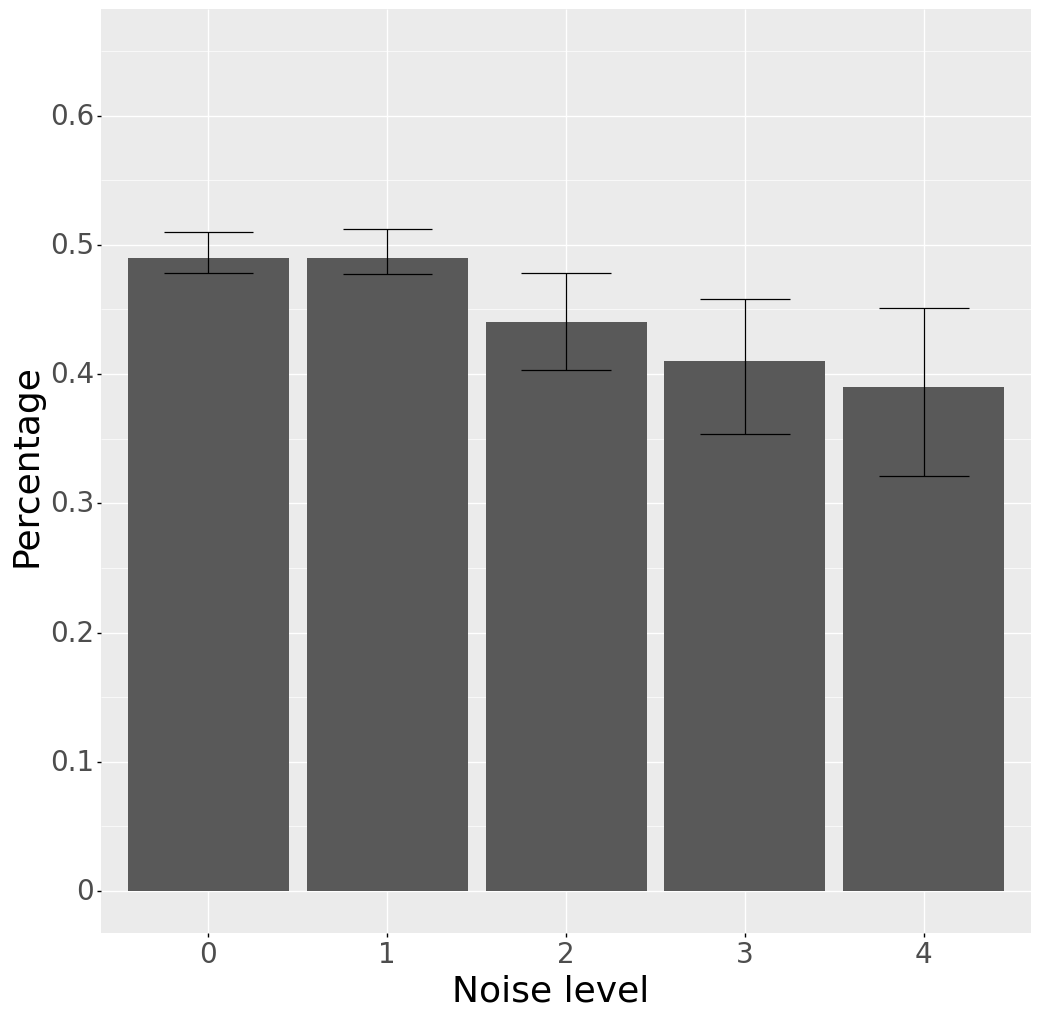

<ggplot: (8742422171777)>

In [15]:
(
    ggplot(data=noisy_df.round(2))
    + aes(x='noise', y='mean') 
    + labs(
        x = 'Noise level',
        y = 'Percentage') +
    geom_bar(stat='identity',position='dodge') + 
    geom_errorbar(data=noisy_df) + aes(ymin='ymin', ymax='ymax') + 
    scale_y_continuous(limits = (0,0.65), breaks=np.linspace(0,0.7,8)) + 
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'))
)

### Missing setting

In [16]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

0.49704000000000015 0.014109900528681737


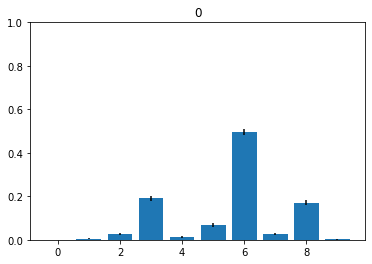

0.4449599999999998 0.0934446219626222


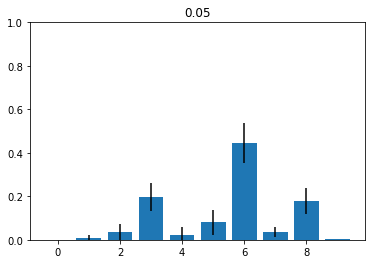

0.4351900000000001 0.09114686727552085


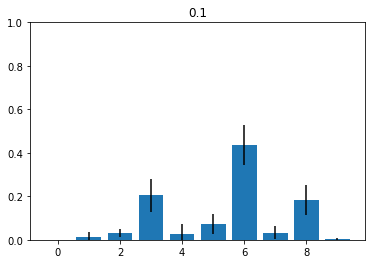

0.40714000000000006 0.0970134865142809


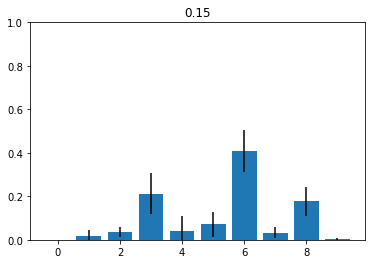

0.3698599999999999 0.11434371540458728


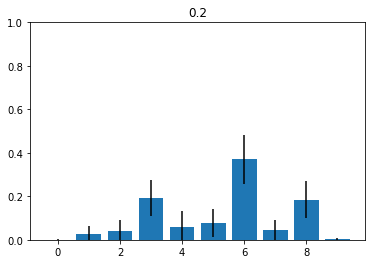

In [17]:
missing_results = []

for missing in [0, 0.05, 0.10, 0.15, 0.20]:
    boot_sample_list = []
    best_route_list = []

    for _ in range(100):
        X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
        if missing != 0:
            X_missing = np.random.choice([-1, 1], 12, p=[missing, 1-missing]).reshape(nr,nc)
            X = X * X_missing
            
            # Compute the median of the non-zero elements
            m = round(np.median(X[X > 0]))
            # Assign the median to the zero elements 
            X[X < 0] = m

        unique_routes = get_unique_routes(X)
        unique_paths = get_path_from_routes(X, unique_routes)
        #path_info_list = get_path_info_from_matrix(X)
        boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

        boot_sample_out = []
        for idx in range(0,len(unique_routes)):
            boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
        boot_sample_out = np.vstack(boot_sample_out)
        boot_sample_list.append(boot_sample_out)

        #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
        best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
        best_route_list.append(best_route)
        
    boot_sample_df = pd.DataFrame(np.array(boot_sample_list)[:,:,1])/1000
    missing_results.append(boot_sample_df)
    
    print(boot_sample_df.mean()[6], boot_sample_df.std()[6])
    
    plt.bar(range(10), boot_sample_df.mean(), yerr=boot_sample_df.std())
    plt.ylim(0,1)
    plt.title(missing)
    plt.show()

In [18]:
missing_df = []
for i in range(5):
    df = missing_results[i]
    missing_df.append([df[6].mean(), df[6].std()])

In [19]:
missing_df = pd.DataFrame(missing_df, columns=['mean', 'std'])
missing_df['missing'] = ['0', '0.05', '0.10', '0.15', '0.20']
missing_df['missing'] = missing_df['missing'].astype(str)

In [20]:
missing_df['ymin'] = (missing_df['mean']-missing_df['std']).clip(lower=0)
missing_df['ymax'] = (missing_df['mean']+missing_df['std']).clip(lower=0)
missing_df

,mean,std,missing,ymin,ymax
0,0.49704,0.014110,0,0.482930,0.511150
1,0.44496,0.093445,0.05,0.351515,0.538405
2,0.43519,0.091147,0.10,0.344043,0.526337
3,0.40714,0.097013,0.15,0.310127,0.504153
4,0.36986,0.114344,0.20,0.255516,0.484204


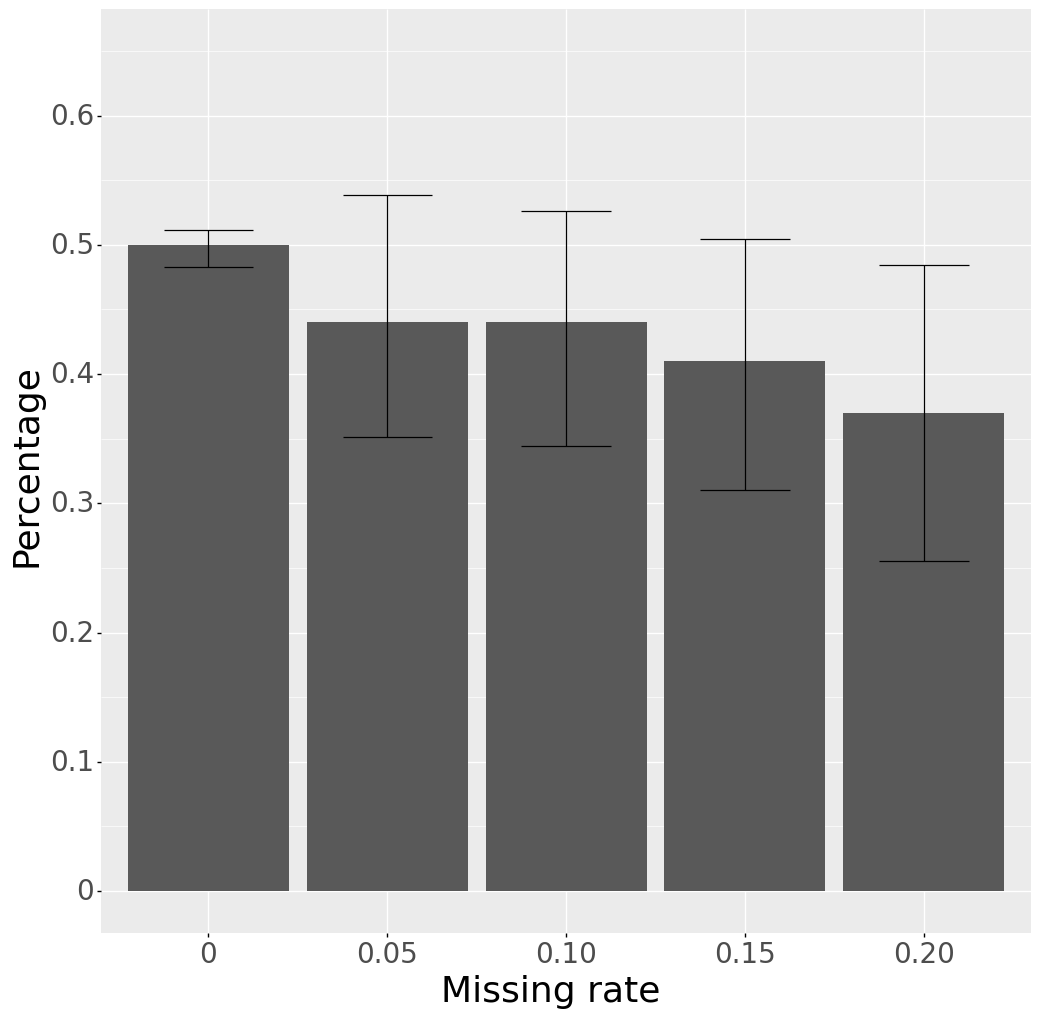

<ggplot: (8742421898641)>

In [21]:
(
    ggplot(data=missing_df.round(2))
    + aes(x='missing', y='mean') 
    + labs(
        x = 'Missing rate',
        y = 'Percentage') +
    geom_bar(stat='identity',position='dodge') + 
    geom_errorbar(data=missing_df) + aes(ymin='ymin', ymax='ymax') + 
    scale_y_continuous(limits = (0,0.65), breaks=np.linspace(0,0.7,8)) + 
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'))
)

### Missing setting

In [22]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

0.4929 0.016163620456526025


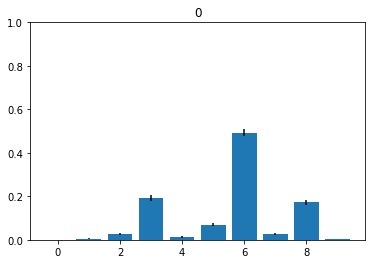

0.45234 0.073988836176736


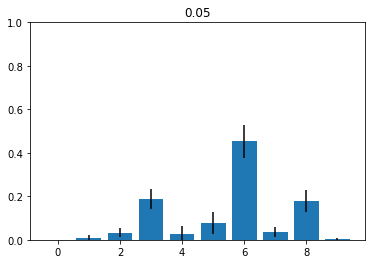

0.43289 0.08424961649044983


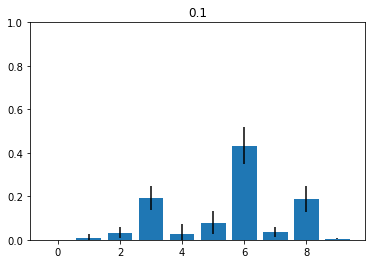

0.39063 0.09606507211681091


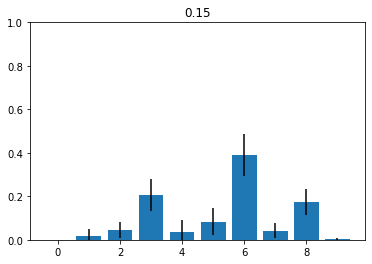

0.37749000000000016 0.0960927051331056


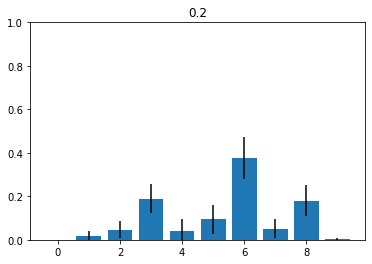

In [23]:
missing_results = []

for missing in [0, 0.05, 0.10, 0.15, 0.20]:
    boot_sample_list = []
    best_route_list = []

    for _ in range(100):
        X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
        if missing != 0:
            X_missing = np.random.choice([-1, 1], 12, p=[missing, 1-missing]).reshape(nr,nc)
            X = X * X_missing
            
            # Compute the median of the non-zero elements
            m = round(np.mean(X[X > 0]))
            # Assign the median to the zero elements 
            X[X < 0] = m

        unique_routes = get_unique_routes(X)
        unique_paths = get_path_from_routes(X, unique_routes)
        #path_info_list = get_path_info_from_matrix(X)
        boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

        boot_sample_out = []
        for idx in range(0,len(unique_routes)):
            boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
        boot_sample_out = np.vstack(boot_sample_out)
        boot_sample_list.append(boot_sample_out)

        #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
        best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
        best_route_list.append(best_route)
        
    boot_sample_df = pd.DataFrame(np.array(boot_sample_list)[:,:,1])/1000
    missing_results.append(boot_sample_df)
    
    print(boot_sample_df.mean()[6], boot_sample_df.std()[6])
    
    plt.bar(range(10), boot_sample_df.mean(), yerr=boot_sample_df.std())
    plt.ylim(0,1)
    plt.title(missing)
    plt.show()

In [24]:
missing_df = []
for i in range(5):
    df = missing_results[i]
    missing_df.append([df[6].mean(), df[6].std()])

In [25]:
missing_df = pd.DataFrame(missing_df, columns=['mean', 'std'])
missing_df['missing'] = ['0', '0.05', '0.10', '0.15', '0.20']
missing_df['missing'] = missing_df['missing'].astype(str)

In [26]:
missing_df['ymin'] = (missing_df['mean']-missing_df['std']).clip(lower=0)
missing_df['ymax'] = (missing_df['mean']+missing_df['std']).clip(lower=0)
missing_df

,mean,std,missing,ymin,ymax
0,0.49290,0.016164,0,0.476736,0.509064
1,0.45234,0.073989,0.05,0.378351,0.526329
2,0.43289,0.084250,0.10,0.348640,0.517140
3,0.39063,0.096065,0.15,0.294565,0.486695
4,0.37749,0.096093,0.20,0.281397,0.473583


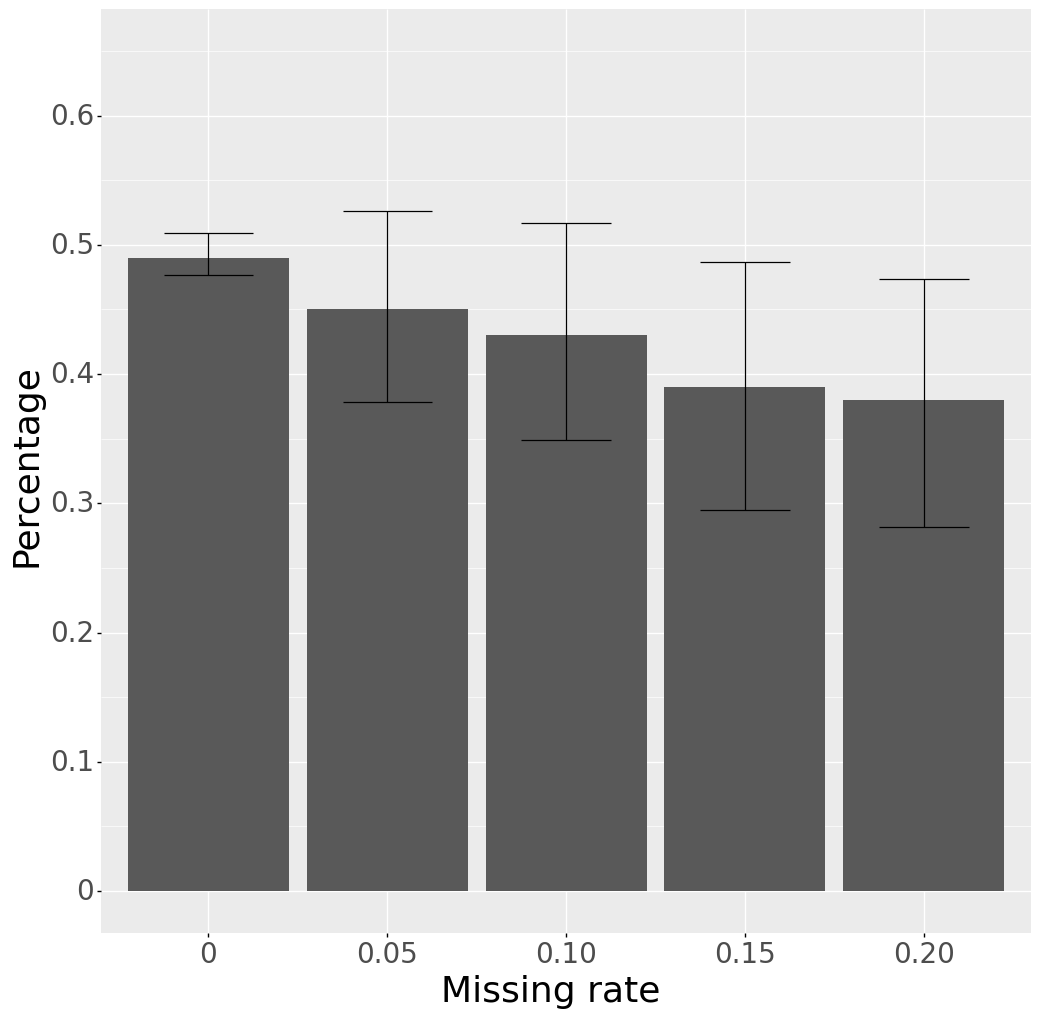

<ggplot: (8742422150089)>

In [27]:
(
    ggplot(data=missing_df.round(2))
    + aes(x='missing', y='mean') 
    + labs(
        x = 'Missing rate',
        y = 'Percentage') +
    geom_bar(stat='identity',position='dodge') + 
    geom_errorbar(data=missing_df) + aes(ymin='ymin', ymax='ymax') + 
    scale_y_continuous(limits = (0,0.65), breaks=np.linspace(0,0.7,8)) + 
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'))
)